# Video Game Data Analysis

The data from the ESRB will be analyzed in this notebook. After analysis is completed, it will be clearer which games succeeded and which did not. Also, it will help with advertising for the sales of video games next year.

## Preprocessing

### Initialization

In [293]:
import pandas as pd
#import streamlit as st
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import random
import math

### Load Data 

In [294]:
df_games = pd.read_csv('moved_games.csv')

### Preparing Data

In [295]:
display(df_games.info())
display(df_games.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [296]:
display(df_games.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [297]:
df_games = df_games.rename(
    columns={'Name':'name',
             'Platform':'platform',
             'Year_of_Release':'year_of_release',
             'Genre':'genre',
             'NA_sales':'na_sales',
             "EU_sales":'eu_sales',
             'JP_sales':'jp_sales',
             'Other_sales':'other_sales',
             'Critic_Score':'critic_score',
             'User_Score':'user_score',
             'Rating':'rating'})
display(df_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [298]:
display(df_games['user_score'].unique())
display(df_games['critic_score'].unique())

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

This cell will first fill empty cells with appropriate default values. Then, the year_of_release column will be changed to integers since years are not used with decimals. The user_score column should be floats, and scores with 'tbd' should be marked with the median score. This ensures the remaining data will not appear skewed and confuse others when analyzing the data later. The critic_score will be changed to integers because all scores given by critics always end in .0 meaning no decimals were used originally.

In [299]:
df_games['year_of_release'] = df_games['year_of_release'].fillna(df_games['year_of_release'].median())
df_games['rating'] = df_games['rating'].fillna('Unknown')
df_games['critic_score'] = df_games['critic_score'].fillna(df_games['critic_score'].median())
df_games['genre'] = df_games['genre'].fillna('Unknown')

In [300]:
df_games['user_score'] = df_games['user_score'].replace(to_replace='tbd',value=None)
df_games['user_score'] = df_games['user_score'].fillna(df_games['user_score'].median())
df_games['user_score'] = df_games['user_score'].astype('float64')

In [301]:
df_games['year_of_release'] = df_games['year_of_release'].astype('int64')
df_games['critic_score'] = df_games['critic_score'].astype('int64')
df_games['user_score'] = df_games['user_score'].astype('float64')

In [302]:
display(df_games['user_score'].sort_values().unique())
display(df_games['critic_score'].sort_values().unique())
display(df_games['year_of_release'].sort_values().unique())

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7])

array([13, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98])

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])

In [303]:
display(df_games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int64  
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


None

In [304]:
display(df_games.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71,7.5,Unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71,7.5,Unknown
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,71,7.5,Unknown
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,71,7.5,Unknown


### Duplicates

Now that the empty cells have been filled, it is time to search for duplicate games. I will search for obvious duplicates first, and then implicit duplicates after. The duplicates will all be from the name of the games being played on the same console.

In [305]:
display(df_games[(df_games.duplicated())])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


No obvious duplicates. Now, it's time to search for implicit duplicates by printing duplicate names and seeing if they come from the same console.

In [306]:
df_duplicate_games = df_games[df_games['name'].duplicated()]
df_duplicate_games = df_duplicate_games.groupby(['name','platform']).count().sort_values(by='genre',ascending=False)
display(df_duplicate_games.head(10))

year_of_release  genre  na_sales  \
name                        platform                                     
Need for Speed: Most Wanted PC                      2      2         2   
                            X360                    2      2         2   
Madden NFL 13               PS3                     2      2         2   
Sonic the Hedgehog          PS3                     2      2         2   
Rhythm Heaven               Wii                     1      1         1   
Ride 2                      PC                      1      1         1   
Ride                        XOne                    1      1         1   
                            X360                    1      1         1   
                            PS3                     1      1         1   
                            PC                      1      1         1   

                                      eu_sales  jp_sales  other_sales  \
name                        platform                                    
Need for Speed: Most Wanted PC               2         2            2   
                            X360             2         2            2   
Madden NFL 13               PS3              2         2            2   
Sonic the Hedgehog          PS3              2         2            2   
Rhythm Heaven               Wii              1         1            1   
Ride 2                      PC               1         1            1   
Ride                        XOne             1         1            1   
                            X360             1         1            1   
                            PS3              1         1            1   
                            PC               1         1            1   

                                      critic_score  user_score  rating  
name                        platform                                    
Need for Speed: Most Wanted PC                   2           2       2  
                            X360                 2           2       2  
Madden NFL 13               PS3                  2           2       2  
Sonic the Hedgehog          PS3                  2           2       2  
Rhythm Heaven               Wii                  1           1       1  
Ride 2                      PC                   1           1       1  
Ride                        XOne                 1           1       1  
                            X360                 1           1       1  
                            PS3                  1           1       1  
                            PC                   1           1       1

Three games have possible implicit duplicates: Need for Speed: Most Wanted, Madden NFL 13, and Sonic the Hedgehog. These implicit duplicates need to be removed. All sales from the duplicate value will be added to the original to ensure no lost sales counts in the data.

In [307]:
display(df_games[df_games['name']=='Need for Speed: Most Wanted'])
display(df_games[df_games['name']=='Madden NFL 13'])
display(df_games[df_games['name']=='Sonic the Hedgehog'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,71,7.5,Unknown
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,71,7.5,Unknown
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,71,7.5,Unknown
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45,6.1,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81,5.8,E
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,71,7.3,E
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63,7.3,E
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75,6.7,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83,5.5,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
257,Sonic the Hedgehog,GEN,1991,Platform,3.03,0.91,0.26,0.13,71,7.5,Unknown
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43,4.1,E10+
1996,Sonic the Hedgehog,X360,2006,Platform,0.44,0.48,0.00,0.11,46,4.4,E10+
4127,Sonic the Hedgehog,PS3,2007,Platform,0.00,0.48,0.00,0.00,43,4.1,E10+


Need for Speed actually does not have any duplicates to be removed. The game was released in 2005 and 2012 on several different consoles. Madden and Sonic both have duplicate postings on the PS3. The dupicates will now be removed and the sales from the duplicate post will be added to the original.

In [308]:
df_games.loc[(df_games['name'] == 'Madden NFL 13') & (df_games['eu_sales'] == 0.22),'eu_sales'] = 0.23
df_games.loc[(df_games['name'] == 'Sonic the Hedgehog') & (df_games['eu_sales'] == 0.06),'eu_sales'] = 0.54
df_games.drop(4127,inplace=True)
df_games.drop(16230,inplace=True)


In [309]:
display(df_games[df_games['name']=='Madden NFL 13'])
display(df_games[df_games['name']=='Sonic the Hedgehog'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81,5.8,E
604,Madden NFL 13,PS3,2012,Sports,2.11,0.23,0.0,0.23,83,5.5,E
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,71,7.3,E
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63,7.3,E
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75,6.7,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
257,Sonic the Hedgehog,GEN,1991,Platform,3.03,0.91,0.26,0.13,71,7.5,Unknown
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.54,0.04,0.66,43,4.1,E10+
1996,Sonic the Hedgehog,X360,2006,Platform,0.44,0.48,0.00,0.11,46,4.4,E10+


### Enrichment

Now that all duplicates have been removed from the DataFrame, it is time to start enriching the data. Start with finding the total sales of each game and creating a new column in the DataFrame for it.

In [310]:
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
display(df_games.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71,7.5,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71,7.5,Unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,71,7.5,Unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,71,7.5,Unknown,28.31


## Comparing Platform Sales 

### Most Popular Platform

In [311]:
platform_sales = []
platform_choice = df_games['platform'].unique()
for platform in platform_choice:
    platform_sales.append([platform,round(df_games[(df_games['platform']==platform)]['total_sales'].sum(),2)])
display(platform_sales)

[['Wii', 907.51],
 ['NES', 251.05],
 ['GB', 255.46],
 ['DS', 806.12],
 ['X360', 971.42],
 ['PS3', 939.65],
 ['PS2', 1255.77],
 ['SNES', 200.04],
 ['GBA', 317.85],
 ['PS4', 314.14],
 ['3DS', 259.0],
 ['N64', 218.68],
 ['PS', 730.86],
 ['XB', 257.74],
 ['PC', 259.52],
 ['2600', 96.98],
 ['PSP', 294.05],
 ['XOne', 159.32],
 ['WiiU', 82.19],
 ['GC', 198.93],
 ['GEN', 30.77],
 ['DC', 15.95],
 ['PSV', 54.07],
 ['SAT', 33.59],
 ['SCD', 1.86],
 ['WS', 1.42],
 ['NG', 1.44],
 ['TG16', 0.16],
 ['3DO', 0.1],
 ['GG', 0.04],
 ['PCFX', 0.03]]

The PS2 had the most total sales next to every other platform in this dataset. Now it is time to build distributions on the PS2 data to see when they were popular, and use their primetime years to evaluate how and why they were so successful.

In [312]:
ps2_games = df_games[(df_games['platform']=='PS2')]
display(ps2_games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97,8.5,M,13.10
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89,8.5,E,11.65


### Specifying Timeline

In [313]:
display(ps2_games.groupby('year_of_release')['name'].count())

year_of_release
2000     82
2001    185
2002    280
2003    256
2004    259
2005    260
2006    259
2007    248
2008    191
2009     96
2010     38
2011      7
Name: name, dtype: int64

Based on the ps2 data by year, the platform was creating games from 2000-2011. This is the time period I will be focusing on to further analyze the data.

In [314]:
relevant_games = df_games[(df_games['year_of_release'] >= 2000) & (df_games['year_of_release'] <= 2011)]

In [315]:
display(relevant_games.groupby('platform')['total_sales'].sum())

platform
2600      10.50
3DS       64.39
DC         7.41
DS       793.55
GB        30.03
GBA      317.85
GC       198.93
N64       37.97
PC       146.83
PS       143.98
PS2     1255.77
PS3      650.86
PSP      282.86
PSV        4.89
WS         0.96
Wii      872.14
X360     734.88
XB       257.74
Name: total_sales, dtype: float64

In this timeframe, besides the PS2, the DS, Wii, and XBOX 360 are leading in sales. The PS3 is not too far behind. Let's see which of these are growing, and which are shrinking.

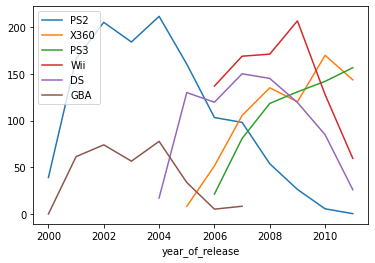

In [316]:
for popular_platform in ['PS2','X360','PS3','Wii','DS','GBA']:
    relevant_games[relevant_games['platform']==popular_platform].groupby('year_of_release')['total_sales'].sum().plot()
plt.legend(['PS2','X360','PS3','Wii','DS','GBA'])
plt.show()

In this timeframe, we saw the ps2 rise and fall, along with the DS, and even the Wii. The XBOX 360 was still high and it is inconclusive if it was falling, or if it just had a slow year. With the fall of the PS2, it was clear that the rise of the PS3 was underway. A very successful platform maybe has a lifespan of popularity of about 10 years. An average platform seems to rise and fall in about 6-7 years.

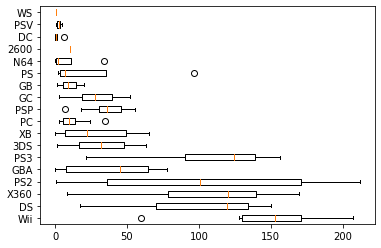

In [317]:
data = []
for platform in relevant_games['platform'].unique():
    data.append(relevant_games[relevant_games['platform']==platform].groupby('year_of_release')['total_sales'].sum())
plt.boxplot(data,vert=False,showfliers=True,labels=relevant_games['platform'].unique())
plt.show()

The difference in sales is very significant between platforms. The most popular platforms have median yearly total sales over triple the less popular platforms. For the largest platforms, their yearly sales were around 120, and the other platforms had yearly sales around 40 or less. Given the timeframe covers the entire existence of the ps2, it has the widest range of yearly sales. On the opposite side, a platform like the 2600 only has data from one year, 2007, in this entire timeframe. Therefore, its range is just one value. The most competitive platforms in this timeframe to the PS2, besides the PS3 since they are the same company, was the XBOX 360, DS, and Wii. 

### Other Popular Platform

I will now take a closer look at the XBOX 360, my personal favorite console, and see how its sales were affected by users, and professional critics. 

In [318]:
xbox_games = relevant_games[relevant_games['platform']=='X360']

<AxesSubplot:title={'center':'Sales vs Critics'}, xlabel='Critic Score', ylabel='Total Sales (USD)'>

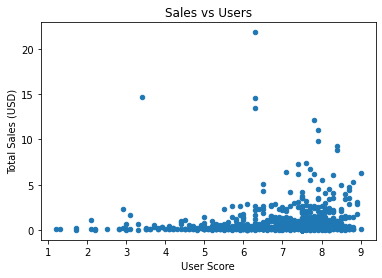

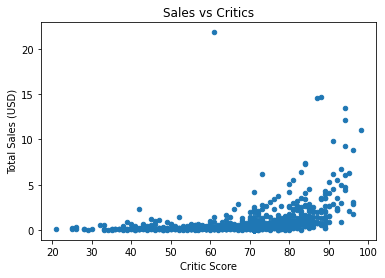

In [319]:
xbox_games.plot(
                kind='scatter',
                title='Sales vs Users',
                x='user_score',
                y='total_sales',
                xlabel='User Score',
                ylabel='Total Sales (USD)'
)
xbox_games.plot(
                kind='scatter',
                title='Sales vs Critics',
                x='critic_score',
                y='total_sales',
                xlabel='Critic Score',
                ylabel='Total Sales (USD)'
)

Based on the scatterplots, there seems to be a little correlation between sales and scores of both critics and users. The effect is not noticed until the user and critic scores are in the top about 20% of scores. The exception to this general rule is the game that Nintendo geniusely included, Wii Sports. This strategy provided all new players with an immediate game and a quick boost. Time to run a quick formality of testing hypotheses on sales versus critics and users.

Null Hypothesis: Total Sales are affected by the scores of critics, and users.

Alternate Hypothesis: Total Sales are not affected by the scores of critics, and users.

In [320]:
alpha = 0.05
results = stats.ttest_ind(xbox_games.groupby('year_of_release')['total_sales'].mean() , xbox_games.groupby('year_of_release')['user_score'].mean() , equal_var=True)

display('p-value:', results.pvalue)
if (results.pvalue < alpha):
    display("We reject the null hypothesis: sales were not significantly affected by user scores.")
else:
    display("We can't reject the null hypothesis: sales were significantly affected by user scores.")

'p-value:'

5.696350956732077e-17

'We reject the null hypothesis: sales were not significantly affected by user scores.'

In [321]:
results = stats.ttest_ind(xbox_games.groupby('year_of_release')['total_sales'].mean() , xbox_games.groupby('year_of_release')['critic_score'].mean() , equal_var=True)

display('p-value:', results.pvalue)
if (results.pvalue < alpha):
    display("We reject the null hypothesis: sales were not significantly affected by critic scores.")
else:
    display("We can't reject the null hypothesis: sales were significantly affected by critic scores.")

'p-value:'

1.8758878570575626e-16

'We reject the null hypothesis: sales were not significantly affected by critic scores.'

### Multiple Platforms

In this section, I am now going to find the games that are in the relevant timeframe of the data that are also on multiple platforms. 

In [322]:
multiple_platforms = relevant_games.groupby('name')['platform'].nunique()

In [323]:
multiple_platforms = relevant_games.groupby('name').agg(platforms=('platform', 'nunique'))
multiple_platform_game_names = multiple_platforms[multiple_platforms['platforms'] > 1].reset_index()['name']
relevant_multiplatform_games = relevant_games[relevant_games['name'].isin(multiple_platform_game_names)].copy()

Now that we have the multiplatform games, it is time to compare how sales are for the games on each of their platforms separately. I am not certain on the best way to do this, so for now, I will just choose a random game from the dataframe and plot its sales per platform, and run several trials and make note of the results. 

<AxesSubplot:title={'center':'Donkey Kong Country Sales by Platform'}, xlabel='platform', ylabel='total_sales'>

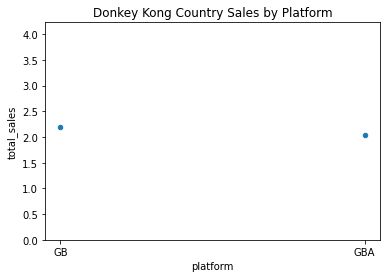

In [324]:
game = random.choice(relevant_multiplatform_games['name'].unique())
relevant_multiplatform_games[relevant_multiplatform_games['name']==game].sort_values(by='platform').plot(
    kind='scatter',
    x='platform',
    y='total_sales',
    title=f'{game} Sales by Platform',
    ylim=(0,relevant_multiplatform_games[relevant_multiplatform_games['name']==game]['total_sales'].sum())
)


Now it is time to compare sales by genre of games. To do this, I will make a dataframe where each column name is a genre, and the entries will be the sale totals for the games of those specific genres. Since putting in a bunch of zeros for the empty cells will skew the averages greatly and make everything seem less profitable, I will leave empty cells empty for now and just plot the existing values on boxplots side by side.

In [325]:
for genre in relevant_multiplatform_games['genre'].unique():
    relevant_multiplatform_games[genre] = relevant_multiplatform_games[relevant_multiplatform_games['genre']==genre]['total_sales']
sales_by_genre_df = pd.DataFrame(data=relevant_multiplatform_games[['Action', 'Shooter', 'Misc', 'Role-Playing', 'Simulation', 'Sports', 'Racing', 'Platform', 'Adventure', 'Fighting', 'Puzzle', 'Strategy']],columns=relevant_multiplatform_games['genre'].unique())
relevant_multiplatform_games = relevant_multiplatform_games.drop(columns=['Action', 'Shooter', 'Misc', 'Role-Playing', 'Simulation', 'Sports', 'Racing', 'Platform', 'Adventure', 'Fighting', 'Puzzle', 'Strategy'])

display(sales_by_genre_df)

,Action,Shooter,Misc,Role-Playing,Simulation,Sports,Racing,Platform,Adventure,Fighting,Puzzle,Strategy
17,20.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,16.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,14.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,14.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,NaN,13.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,NaN,NaN
16690,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16706,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16709,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [326]:
display(sales_by_genre_df.sum())

Action          788.53
Shooter         438.86
Misc            253.88
Role-Playing    132.93
Simulation       86.09
Sports          601.67
Racing          269.37
Platform        145.53
Adventure        58.49
Fighting        146.17
Puzzle           21.96
Strategy         22.01
dtype: float64

<AxesSubplot:title={'center':'Sales by Genre Without Outliers'}>

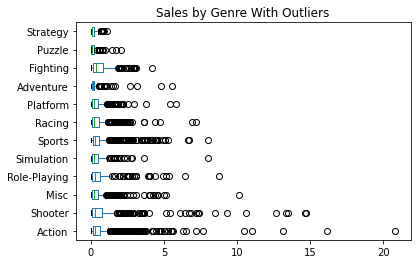

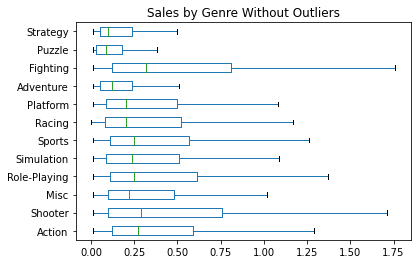

In [327]:
sales_by_genre_df[['Action', 'Shooter', 'Misc', 'Role-Playing', 'Simulation', 'Sports', 'Racing', 'Platform', 'Adventure', 'Fighting', 'Puzzle', 'Strategy']].plot(
    kind='box',
    title='Sales by Genre With Outliers',
    vert=False,
    showfliers=True
)
sales_by_genre_df[['Action', 'Shooter', 'Misc', 'Role-Playing', 'Simulation', 'Sports', 'Racing', 'Platform', 'Adventure', 'Fighting', 'Puzzle', 'Strategy']].plot(
    kind='box',
    title='Sales by Genre Without Outliers',
    vert=False,
    showfliers=False
)

Looking at all of the genres side by side, without outliers paints a better general picture. Fighting games do better on average as the median sales is largest and even its upper and lower quartiles are higher than the other genres. However, when looking at the outliers, it can be argued that sports, action, and shooter games are the most successful. However, for these genres, if the games are not exceptional, they will not do as well.

## Regional Sales

It is now time to determine the 5 most popular platforms and genres of each region and figure out if the ESRB rating affects the sales in each region. Starting with North America.

### North America Platforms

In [328]:
na_relevant_games = relevant_games[relevant_games['na_sales']>0]

In [329]:
platform_sales.clear()
for platform in platform_choice:
    platform_sales.append([platform,round(na_relevant_games[(na_relevant_games['platform']==platform)]['na_sales'].sum(),2)])
display(platform_sales)

[['Wii', 479.45],
 ['NES', 0.0],
 ['GB', 9.8],
 ['DS', 377.81],
 ['X360', 462.42],
 ['PS3', 290.11],
 ['PS2', 583.84],
 ['SNES', 0.0],
 ['GBA', 187.54],
 ['PS4', 0.0],
 ['3DS', 28.18],
 ['N64', 21.99],
 ['PS', 67.51],
 ['XB', 186.69],
 ['PC', 46.0],
 ['2600', 9.82],
 ['PSP', 109.04],
 ['XOne', 0.0],
 ['WiiU', 0.0],
 ['GC', 133.46],
 ['GEN', 0.0],
 ['DC', 2.53],
 ['PSV', 1.6],
 ['SAT', 0.0],
 ['SCD', 0.0],
 ['WS', 0.0],
 ['NG', 0.0],
 ['TG16', 0.0],
 ['3DO', 0.0],
 ['GG', 0.0],
 ['PCFX', 0.0]]

Based on the sales list of each platform in North America, the top 5 most popular platforms are 
1. PS2 
2. Wii
3. XBOX 360 
4. DS
5. PS3 
I will now also count how many games were sold on each platform. This will ensure that the sales of very popular games do not leave the less popular games out of the picture.

In [330]:
for platform in ['PS2','Wii','X360','DS','PS3']:
    count = na_relevant_games[na_relevant_games['platform']==platform]['platform'].count()
    display(f'{platform}: {count}')

'PS2: 1648'

'Wii: 1114'

'X360: 874'

'DS: 1514'

'PS3: 694'

Based on just number of games sold on each of the 5 platforms, the popularity ranking is:
1. PS2
2. DS
3. Wii
4. XBOX 360
5. PS3 
To make a final conclusion, I will make boxplot distributions of each of the sales of the platforms.

In [331]:
for platform in ['PS2','Wii','X360','DS','PS3']:
    na_relevant_games[platform] = relevant_multiplatform_games[relevant_multiplatform_games['platform']==platform]['na_sales']
na_sales_by_platform_df = pd.DataFrame(data=na_relevant_games[['PS2','Wii','X360','DS','PS3']],columns=['PS2','Wii','X360','DS','PS3'])
na_relevant_games = na_relevant_games.drop(columns=['PS2','Wii','X360','DS','PS3'])

/tmp/ipykernel_44/3484332577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na_relevant_games[platform] = relevant_multiplatform_games[relevant_multiplatform_games['platform']==platform]['na_sales']


<AxesSubplot:title={'center':'Sales by Platform Without Outliers'}>

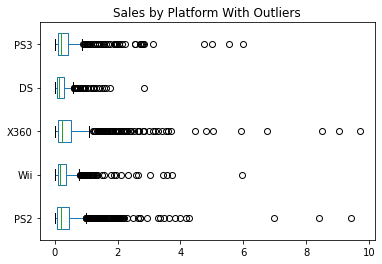

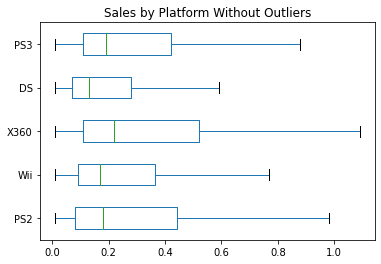

In [332]:
na_sales_by_platform_df[['PS2','Wii','X360','DS','PS3']].plot(
    kind='box',
    title='Sales by Platform With Outliers',
    vert=False,
    showfliers=True
)
na_sales_by_platform_df[['PS2','Wii','X360','DS','PS3']].plot(
    kind='box',
    title='Sales by Platform Without Outliers',
    vert=False,
    showfliers=False
)

### Europe Platforms

In [333]:
eu_relevant_games = relevant_games[relevant_games['eu_sales']>0]

In [334]:
platform_sales.clear()
for platform in platform_choice:
    platform_sales.append([platform,round(na_relevant_games[(na_relevant_games['platform']==platform)]['eu_sales'].sum(),2)])
display(platform_sales)

[['Wii', 242.26],
 ['NES', 0.0],
 ['GB', 5.5],
 ['DS', 177.33],
 ['X360', 194.56],
 ['PS3', 217.35],
 ['PS2', 329.58],
 ['SNES', 0.0],
 ['GBA', 75.25],
 ['PS4', 0.0],
 ['3DS', 18.56],
 ['N64', 6.16],
 ['PS', 48.16],
 ['XB', 60.95],
 ['PC', 57.2],
 ['2600', 0.61],
 ['PSP', 64.21],
 ['XOne', 0.0],
 ['WiiU', 0.0],
 ['GC', 38.71],
 ['GEN', 0.0],
 ['DC', 0.79],
 ['PSV', 1.76],
 ['SAT', 0.0],
 ['SCD', 0.0],
 ['WS', 0.0],
 ['NG', 0.0],
 ['TG16', 0.0],
 ['3DO', 0.0],
 ['GG', 0.0],
 ['PCFX', 0.0]]

Based on the sales list of each platform in Europe, the top 5 most popular platforms are 
1. PS2 
2. Wii
3. PS3 
4. XBOX 360
5. DS
I will now also count how many games were sold on each platform. This will ensure that the sales of very popular games do not leave the less popular games out of the picture.

In [335]:
for platform in ['PS2','Wii','X360','DS','PS3']:
    count = eu_relevant_games[eu_relevant_games['platform']==platform]['platform'].count()
    display(f'{platform}: {count}')

'PS2: 1635'

'Wii: 689'

'X360: 730'

'DS: 742'

'PS3: 652'

Based on just number of games sold on each of the 5 platforms, the popularity ranking is:
1. PS2
2. DS
3. XBOX 360
4. Wii
5. PS3
To make a final conclusion, I will make boxplot distributions of each of the sales of the platforms.

In [336]:
for platform in ['PS2','Wii','X360','DS','PS3']:
    eu_relevant_games[platform] = relevant_multiplatform_games[relevant_multiplatform_games['platform']==platform]['eu_sales']
eu_sales_by_platform_df = pd.DataFrame(data=eu_relevant_games[['PS2','Wii','X360','DS','PS3']],columns=['PS2','Wii','X360','DS','PS3'])
eu_relevant_games = eu_relevant_games.drop(columns=['PS2','Wii','X360','DS','PS3'])

/tmp/ipykernel_44/1785026699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eu_relevant_games[platform] = relevant_multiplatform_games[relevant_multiplatform_games['platform']==platform]['eu_sales']


<AxesSubplot:title={'center':'Sales by Platform Without Outliers'}>

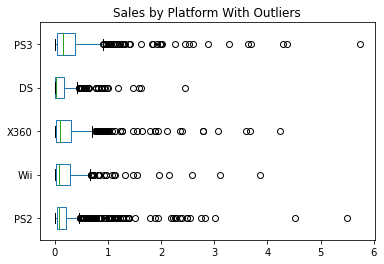

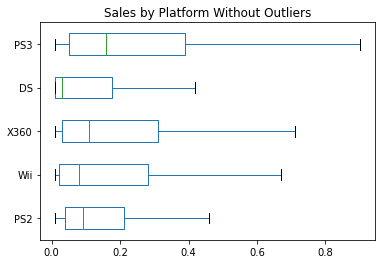

In [337]:
eu_sales_by_platform_df[['PS2','Wii','X360','DS','PS3']].plot(
    kind='box',
    title='Sales by Platform With Outliers',
    vert=False,
    showfliers=True
)
eu_sales_by_platform_df[['PS2','Wii','X360','DS','PS3']].plot(
    kind='box',
    title='Sales by Platform Without Outliers',
    vert=False,
    showfliers=False
)

### Japan Platforms

In [338]:
jp_relevant_games = relevant_games[relevant_games['jp_sales']>0]

In [339]:
platform_sales.clear()
for platform in platform_choice:
    platform_sales.append([platform,round(jp_relevant_games[(jp_relevant_games['platform']==platform)]['jp_sales'].sum(),2)])
display(platform_sales)

[['Wii', 65.94],
 ['NES', 0.0],
 ['GB', 13.01],
 ['DS', 171.83],
 ['X360', 10.86],
 ['PS3', 44.9],
 ['PS2', 139.2],
 ['SNES', 0.0],
 ['GBA', 47.33],
 ['PS4', 0.0],
 ['3DS', 12.88],
 ['N64', 8.71],
 ['PS', 20.14],
 ['XB', 1.38],
 ['PC', 0.08],
 ['2600', 0.0],
 ['PSP', 66.31],
 ['XOne', 0.0],
 ['WiiU', 0.0],
 ['GC', 21.58],
 ['GEN', 0.0],
 ['DC', 3.96],
 ['PSV', 0.87],
 ['SAT', 0.0],
 ['SCD', 0.0],
 ['WS', 0.96],
 ['NG', 0.0],
 ['TG16', 0.0],
 ['3DO', 0.0],
 ['GG', 0.0],
 ['PCFX', 0.0]]

Based on the sales list of each platform in Europe, the top 5 most popular platforms are 
1. DS 
2. PS2
3. PSP 
4. Wii
5. PS3
I will now also count how many games were sold on each platform. This will ensure that the sales of very popular games do not leave the less popular games out of the picture.

In [340]:
for platform in ['PS2','Wii','X360','DS','PS3']:
    count = jp_relevant_games[jp_relevant_games['platform']==platform]['platform'].count()
    display(f'{platform}: {count}')

'PS2: 797'

'Wii: 263'

'X360: 301'

'DS: 756'

'PS3: 377'

Based on just number of games sold on each of the 5 platforms, the popularity ranking is:
1. PS2
2. DS
3. PS3
4. XBOX 360
5. Wii
To make a final conclusion, I will make boxplot distributions of each of the sales of the platforms.

In [341]:
for platform in ['PS2','Wii','X360','DS','PS3']:
    jp_relevant_games[platform] = relevant_multiplatform_games[relevant_multiplatform_games['platform']==platform]['jp_sales']
jp_sales_by_platform_df = pd.DataFrame(data=jp_relevant_games[['PS2','Wii','X360','DS','PS3']],columns=['PS2','Wii','X360','DS','PS3'])
jp_relevant_games = jp_relevant_games.drop(columns=['PS2','Wii','X360','DS','PS3'])

/tmp/ipykernel_44/2025769179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jp_relevant_games[platform] = relevant_multiplatform_games[relevant_multiplatform_games['platform']==platform]['jp_sales']


<AxesSubplot:title={'center':'Sales by Platform Without Outliers'}>

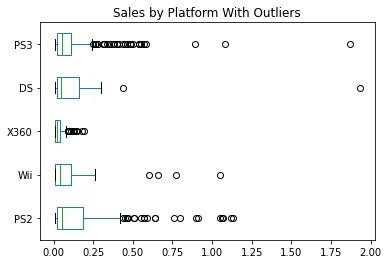

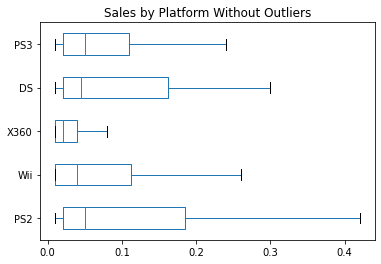

In [342]:
jp_sales_by_platform_df[['PS2','Wii','X360','DS','PS3']].plot(
    kind='box',
    title='Sales by Platform With Outliers',
    vert=False,
    showfliers=True
)
jp_sales_by_platform_df[['PS2','Wii','X360','DS','PS3']].plot(
    kind='box',
    title='Sales by Platform Without Outliers',
    vert=False,
    showfliers=False
)

Based on the total sales in Japan, number of games sold, and sale distribution

### North America Genres

In [343]:
na_relevant_games_genres_sales = []
for genre in na_relevant_games['genre'].unique():
    na_relevant_games_genres_sales.append([genre,round(na_relevant_games[(na_relevant_games['genre']==genre)]['na_sales'].sum(),2)])
display(na_relevant_games_genres_sales)

[['Sports', 521.09],
 ['Racing', 257.58],
 ['Platform', 233.23],
 ['Misc', 334.78],
 ['Simulation', 155.72],
 ['Action', 590.27],
 ['Role-Playing', 219.07],
 ['Puzzle', 64.76],
 ['Shooter', 357.87],
 ['Fighting', 143.83],
 ['Adventure', 76.95],
 ['Strategy', 42.64]]

Based on the sales list of each genre in North America, the top 5 most popular genres are 
1. Action 
2. Sports
3. Shooter 
4. Miscellaneous
5. Racing
I will now also count how many games were sold in each genre. This will ensure that the sales of very popular games do not leave the less popular games out of the picture.

In [344]:
na_relevant_games_genres_num_games = []
for genre in ['Action','Sports','Shooter','Misc','Racing']:
    na_relevant_games_genres_num_games.append([genre,na_relevant_games[(na_relevant_games['genre']==genre)]['na_sales'].count()])
display(na_relevant_games_genres_num_games)

[['Action', 1827],
 ['Sports', 1463],
 ['Shooter', 826],
 ['Misc', 1045],
 ['Racing', 867]]

Based on just number of games sold in each of the 5 genres, the popularity ranking is:
1. Action
2. Sports
3. Miscellaneous
4. Racing
5. Shooter
To make a final conclusion, I will make boxplot distributions of each of the sales of the platforms.

In [345]:
for genre in ['Action','Sports','Shooter','Misc','Racing']:
    na_relevant_games[genre] = relevant_multiplatform_games[relevant_multiplatform_games['genre']==genre]['na_sales']
na_sales_by_genre_df = pd.DataFrame(data=na_relevant_games[['Action','Sports','Shooter','Misc','Racing']],columns=['Action','Sports','Shooter','Misc','Racing'])
na_relevant_games = na_relevant_games.drop(columns=['Action','Sports','Shooter','Misc','Racing'])

<AxesSubplot:title={'center':'Sales by Genre Without Outliers'}>

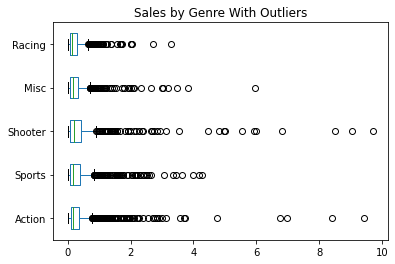

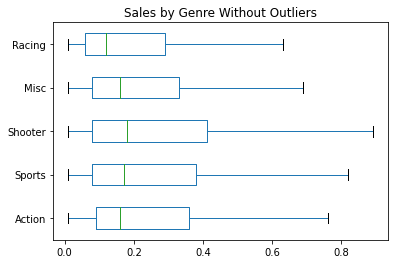

In [346]:
na_sales_by_genre_df[['Action','Sports','Shooter','Misc','Racing']].plot(
    kind='box',
    title='Sales by Genre With Outliers',
    vert=False,
    showfliers=True
)
na_sales_by_genre_df[['Action','Sports','Shooter','Misc','Racing']].plot(
    kind='box',
    title='Sales by Genre Without Outliers',
    vert=False,
    showfliers=False
)

### Europe Genres

In [347]:
eu_relevant_games_genres_sales = []
for genre in eu_relevant_games['genre'].unique():
    eu_relevant_games_genres_sales.append([genre,round(na_relevant_games[(na_relevant_games['genre']==genre)]['eu_sales'].sum(),2)])
display(eu_relevant_games_genres_sales)

[['Sports', 265.07],
 ['Racing', 162.13],
 ['Platform', 118.6],
 ['Misc', 153.79],
 ['Simulation', 85.44],
 ['Action', 310.95],
 ['Role-Playing', 104.36],
 ['Puzzle', 35.26],
 ['Shooter', 178.53],
 ['Fighting', 64.92],
 ['Adventure', 37.67],
 ['Strategy', 22.22]]

Based on the sales list of each genre in Europe, the top 5 most popular genres are 
1. Action 
2. Sports
3. Shooter 
4. Racing
5. Miscellaneous
I will now also count how many games were sold in each genre. This will ensure that the sales of very popular games do not leave the less popular games out of the picture.

In [348]:
eu_relevant_games_genres_num_games = []
for genre in ['Action','Sports','Shooter','Misc','Racing']:
    eu_relevant_games_genres_num_games.append([genre,eu_relevant_games[(eu_relevant_games['genre']==genre)]['eu_sales'].count()])
display(eu_relevant_games_genres_num_games)

[['Action', 1611],
 ['Sports', 1154],
 ['Shooter', 751],
 ['Misc', 782],
 ['Racing', 758]]

Based on just number of games sold in each of the 5 genres, the popularity ranking is:
1. Action
2. Sports
3. Miscellaneous
4. Racing
5. Shooter
To make a final conclusion, I will make boxplot distributions of each of the sales of the platforms.

In [349]:
for genre in ['Action','Sports','Shooter','Misc','Racing']:
    eu_relevant_games[genre] = relevant_multiplatform_games[relevant_multiplatform_games['genre']==genre]['eu_sales']
eu_sales_by_genre_df = pd.DataFrame(data=eu_relevant_games[['Action','Sports','Shooter','Misc','Racing']],columns=['Action','Sports','Shooter','Misc','Racing'])
eu_relevant_games = eu_relevant_games.drop(columns=['Action','Sports','Shooter','Misc','Racing'])

<AxesSubplot:title={'center':'Sales by Genre Without Outliers'}>

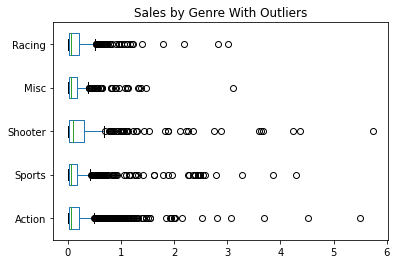

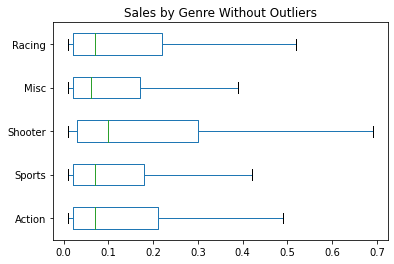

In [350]:
eu_sales_by_genre_df[['Action','Sports','Shooter','Misc','Racing']].plot(
    kind='box',
    title='Sales by Genre With Outliers',
    vert=False,
    showfliers=True
)
eu_sales_by_genre_df[['Action','Sports','Shooter','Misc','Racing']].plot(
    kind='box',
    title='Sales by Genre Without Outliers',
    vert=False,
    showfliers=False
)

### Japan Genres

In [351]:
jp_relevant_games_genres_sales = []
for genre in jp_relevant_games['genre'].unique():
    jp_relevant_games_genres_sales.append([genre,round(jp_relevant_games[(jp_relevant_games['genre']==genre)]['jp_sales'].sum(),2)])
display(jp_relevant_games_genres_sales)

[['Sports', 68.48],
 ['Racing', 25.32],
 ['Platform', 46.76],
 ['Misc', 73.66],
 ['Simulation', 29.91],
 ['Action', 80.72],
 ['Role-Playing', 178.29],
 ['Puzzle', 22.67],
 ['Shooter', 14.13],
 ['Fighting', 35.65],
 ['Adventure', 29.16],
 ['Strategy', 25.19]]

Based on the sales list of each genre in Europe, the top 5 most popular genres are 
1. Role-Playing 
2. Action
3. Miscellaneous 
4. Sports
5. Platform
I will now also count how many games were sold in each genre. This will ensure that the sales of very popular games do not leave the less popular games out of the picture.

In [352]:
jp_relevant_games_genres_num_games = []
for genre in ['Role-Playing','Action','Misc','Sports','Platform']:
    jp_relevant_games_genres_num_games.append([genre,jp_relevant_games[(jp_relevant_games['genre']==genre)]['jp_sales'].count()])
display(jp_relevant_games_genres_num_games)

[['Role-Playing', 610],
 ['Action', 562],
 ['Misc', 360],
 ['Sports', 373],
 ['Platform', 139]]

Based on just number of games sold in each of the 5 genres, the popularity ranking is:
1. Role-Playing
2. Action
3. Sports
4. Miscellaneous
5. Platform
To make a final conclusion, I will make boxplot distributions of each of the sales of the platforms.

In [353]:
for genre in ['Role-Playing','Action','Misc','Sports','Platform']:
    jp_relevant_games[genre] = relevant_multiplatform_games[relevant_multiplatform_games['genre']==genre]['jp_sales']
jp_sales_by_genre_df = pd.DataFrame(data=jp_relevant_games[['Role-Playing','Action','Misc','Sports','Platform']],columns=['Role-Playing','Action','Misc','Sports','Platform'])
jp_relevant_games = jp_relevant_games.drop(columns=['Role-Playing','Action','Misc','Sports','Platform'])

<AxesSubplot:title={'center':'Sales by Genre Without Outliers'}>

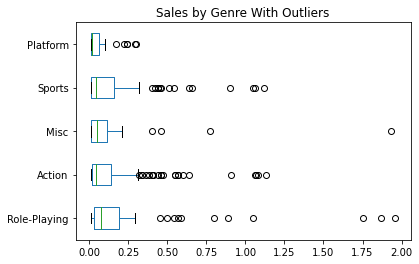

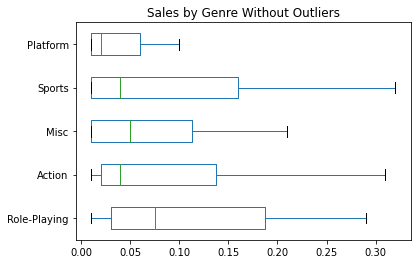

In [354]:
jp_sales_by_genre_df[['Role-Playing','Action','Misc','Sports','Platform']].plot(
    kind='box',
    title='Sales by Genre With Outliers',
    vert=False,
    showfliers=True
)
jp_sales_by_genre_df[['Role-Playing','Action','Misc','Sports','Platform']].plot(
    kind='box',
    title='Sales by Genre Without Outliers',
    vert=False,
    showfliers=False
)

### ESRB North America

In [355]:
na_relevant_games_rating_sales = []
for rating in na_relevant_games['rating'].unique():
    na_relevant_games_rating_sales.append([rating,round(na_relevant_games[(na_relevant_games['rating']==rating)]['na_sales'].sum(),2)])
display(na_relevant_games_rating_sales)

[['E', 1153.64],
 ['Unknown', 405.93],
 ['M', 501.82],
 ['T', 655.99],
 ['E10+', 277.62],
 ['AO', 1.26],
 ['EC', 1.53]]

Based on rating sales alone, it seems like games rated E are the most popular. Hoowever, it's likely that more games are made rated E. Let's make some boxplots to see the distribution of sales of games based on rating.

In [356]:
for rating in ['E','Unknown','M','T','E10+','AO','EC']:
    na_relevant_games[rating] = relevant_multiplatform_games[relevant_multiplatform_games['rating']==rating]['na_sales']
na_sales_by_genre_df = pd.DataFrame(data=na_relevant_games[['E','Unknown','M','T','E10+','AO','EC']],columns=['E','Unknown','M','T','E10+','AO','EC'])
na_relevant_games = na_relevant_games.drop(columns=['E','Unknown','M','T','E10+','AO','EC'])

<AxesSubplot:title={'center':'Sales by Rating Without Outliers'}>

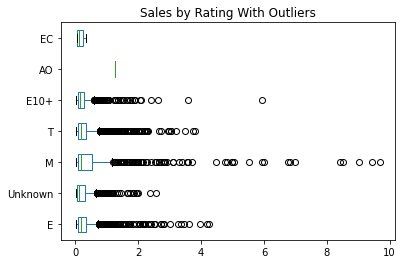

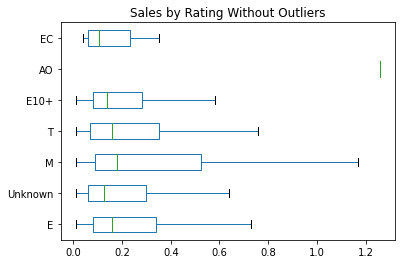

In [357]:
na_sales_by_genre_df[['E','Unknown','M','T','E10+','AO','EC']].plot(
    kind='box',
    title='Sales by Rating With Outliers',
    vert=False,
    showfliers=True
)
na_sales_by_genre_df[['E','Unknown','M','T','E10+','AO','EC']].plot(
    kind='box',
    title='Sales by Rating Without Outliers',
    vert=False,
    showfliers=False
)

### ESRB Europe

In [358]:
eu_relevant_games_rating_sales = []
for rating in eu_relevant_games['rating'].unique():
    eu_relevant_games_rating_sales.append([rating,round(eu_relevant_games[(eu_relevant_games['rating']==rating)]['eu_sales'].sum(),2)])
display(eu_relevant_games_rating_sales)

[['E', 583.96],
 ['Unknown', 257.96],
 ['M', 282.41],
 ['T', 344.99],
 ['E10+', 133.13],
 ['AO', 0.61],
 ['EC', 0.11],
 ['RP', 0.08]]

In [359]:
for rating in ['E','Unknown','M','T','E10+','AO','EC']:
    eu_relevant_games[rating] = relevant_multiplatform_games[relevant_multiplatform_games['rating']==rating]['eu_sales']
eu_sales_by_genre_df = pd.DataFrame(data=eu_relevant_games[['E','Unknown','M','T','E10+','AO','EC']],columns=['E','Unknown','M','T','E10+','AO','EC'])
eu_relevant_games = eu_relevant_games.drop(columns=['E','Unknown','M','T','E10+','AO','EC'])

<AxesSubplot:title={'center':'Sales by Rating Without Outliers'}>

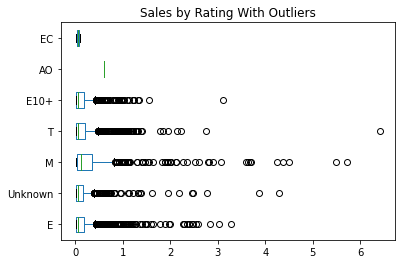

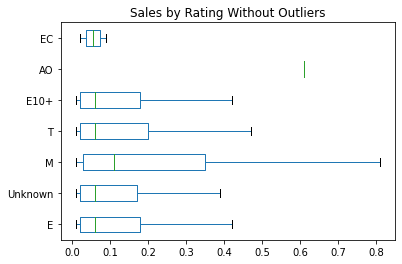

In [360]:
eu_sales_by_genre_df[['E','Unknown','M','T','E10+','AO','EC']].plot(
    kind='box',
    title='Sales by Rating With Outliers',
    vert=False,
    showfliers=True
)
eu_sales_by_genre_df[['E','Unknown','M','T','E10+','AO','EC']].plot(
    kind='box',
    title='Sales by Rating Without Outliers',
    vert=False,
    showfliers=False
)

### ESRB Japan

In [361]:
jp_relevant_games_rating_sales = []
for rating in na_relevant_games['rating'].unique():
    jp_relevant_games_rating_sales.append([rating,round(jp_relevant_games[(jp_relevant_games['rating']==rating)]['eu_sales'].sum(),2)])
display(jp_relevant_games_rating_sales)

[['E', 344.0],
 ['Unknown', 127.23],
 ['M', 193.06],
 ['T', 147.41],
 ['E10+', 39.72],
 ['AO', 0.0],
 ['EC', 0.0]]

In [362]:
for rating in ['E','Unknown','M','T','E10+','AO','EC']:
    jp_relevant_games[rating] = relevant_multiplatform_games[relevant_multiplatform_games['rating']==rating]['jp_sales']
jp_sales_by_genre_df = pd.DataFrame(data=jp_relevant_games[['E','Unknown','M','T','E10+','AO','EC']],columns=['E','Unknown','M','T','E10+','AO','EC'])
jp_relevant_games = jp_relevant_games.drop(columns=['E','Unknown','M','T','E10+','AO','EC'])

<AxesSubplot:title={'center':'Sales by Rating Without Outliers'}>

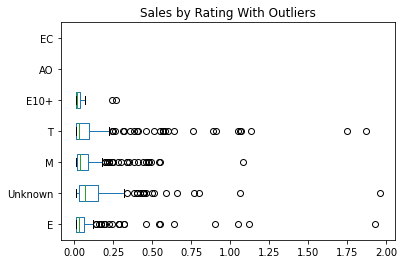

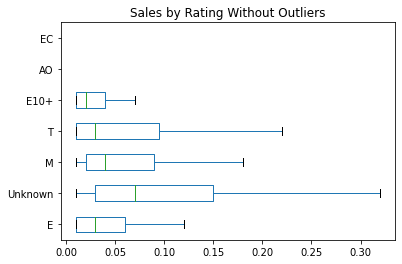

In [363]:
jp_sales_by_genre_df[['E','Unknown','M','T','E10+','AO','EC']].plot(
    kind='box',
    title='Sales by Rating With Outliers',
    vert=False,
    showfliers=True
)
jp_sales_by_genre_df[['E','Unknown','M','T','E10+','AO','EC']].plot(
    kind='box',
    title='Sales by Rating Without Outliers',
    vert=False,
    showfliers=False
)

## Test Hypotheses

### XBOX vs PC

The user score is not affected if a game is played on the XBOX One or the PC.

In [364]:
alpha = 0.05
results = stats.ttest_ind(relevant_games[relevant_games['platform']=='XB']['user_score'] , relevant_games[relevant_games['platform']=='PC']['user_score'] , equal_var=True)

display(f'p-value: {results.pvalue}')
if (results.pvalue < alpha):
    display("We reject the null hypothesis: user score was affected by the platform chosen.")
else:
    display("We can't reject the null hypothesis: user score was not significantly affected based on the platform.")

'p-value: 0.01574406892761933'

'We reject the null hypothesis: user score was affected by the platform chosen.'

### Action vs Sports

The user score is not affected depending on if a game is labeled 'Action' or 'Sports.'

In [365]:
alpha = 0.05
results = stats.ttest_ind(relevant_games[relevant_games['genre']=='Action']['user_score'] , relevant_games[relevant_games['genre']=='Sports']['user_score'] , equal_var=True)

display(f'p-value: {results.pvalue}')
if (results.pvalue < alpha):
    display("We reject the null hypothesis: user score was affected by genre.")
else:
    display("We can't reject the null hypothesis: user score was not significantly affected by the genre.")

'p-value: 0.04500898475123876'

'We reject the null hypothesis: user score was affected by genre.'

I formulated the null hypothesis by asking myself "Does platform affect the user score?" and "Does genre affect the user score?" Then, I rephrased that question and assumed and rewrote statements that assume there is no relationship between genres, platforms, and user scores.

The significance level I chose for these tests were 0.05 because if I am telling the company that user ratings are not affected based on genre or platform, I want that to be at least 95% guaranteed. Otherwise, if the scores are affected, we need to take those factors in account and make more games that have a better chance of impressing our users.

## Conclusion

Action and sports games are the most popular genres of video games to play worldwide. No matter what platform these games are played on, their ratings by players are not affected. North America contributes the most sales to video games, followed by Europe, and relatively speaking, Japan does not contribute as much. Games that are sold on multiple platforms likely have a most popular platform the game is played on. The PS2 was the most popular platform for the the longest timeline for videogames.